<a href="https://colab.research.google.com/github/sanjay24-afk/sanjay24-afk/blob/main/Copy_of_Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, confusion_matrix, roc_curve, auc
)
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv("creditcard.csv")

print("✔ Dataset Loaded Successfully!\n")
print(df.head())

✔ Dataset Loaded Successfully!

                                                                                                                                                                70719  \
43283.0  1.099269 -1.642875 0.732946 -1.308379 -1.830416 -0.071863 -1.205424 0.075125 -1.931158  1.471863  1.634958  0.081591  0.738283 -0.278179  0.366464 -0.297733   
        -0.961726  1.341852 1.309345  2.104859 -0.352290 -0.022416  1.024964 0.279705 -2.231895  0.039846  0.217737  0.411831  1.140255  0.602819  1.203582 -0.501806   
        -1.358973 -0.171110 2.226042  1.496229 -0.022981  0.289166 -0.006644 0.284833  0.323060 -0.411012 -1.000248 -0.470726 -1.413357 -0.141686  0.299896 -1.103936   
        -2.257810  1.117289 0.458714  0.647211  0.404366  0.191859  0.065017 0.361723  0.132699  1.311933  1.518233  0.325941 -1.042373  0.555942  1.065778 -0.689390   
43285.0  1.000566 -0.131090 1.323945  1.237959 -0.968216 -0.052410 -0.495590 0.126385  0.324562 -0.035789  1.397237  1.6980

In [ ]:
df = pd.read_csv("creditcard.csv")

print("✔ Dataset Loaded Successfully!\n")

# The last column is assumed to be the target variable (fraud column)
y = df.iloc[:, -1]
X = df.iloc[:, :-1]

numeric_cols = X.select_dtypes(include=['int64','float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

✔ Dataset Loaded Successfully!

Shape of X: (237179, 14)
Shape of y: (237179,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (189743, 14)
Testing data shape: (47436, 14)


In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('passthrough', 'passthrough')
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)
print("✔ Preprocessing pipeline defined with imputation!")

✔ Preprocessing pipeline defined with imputation!


In [ ]:
model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42))
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
print("Missing values in X before imputation:")
print(X.isnull().sum())

Missing values in X before imputation:
70719                  0
-0.0100767341356945    0
0.0306931172321238     0
0.400789904714754      0
-0.156618998309174     0
-0.0243748227106521    0
0.0246311297530648     0
-0.0807320444888695    0
0.562094892475978      0
0.475217130481677      0
0.410253299173444      0
-0.0323900742814849    0
0.0039483929809513     0
29.95                  0
dtype: int64


Accuracy: 0.9992
Precision: 0.8889
Recall: 0.6437
ROC AUC: 0.9402


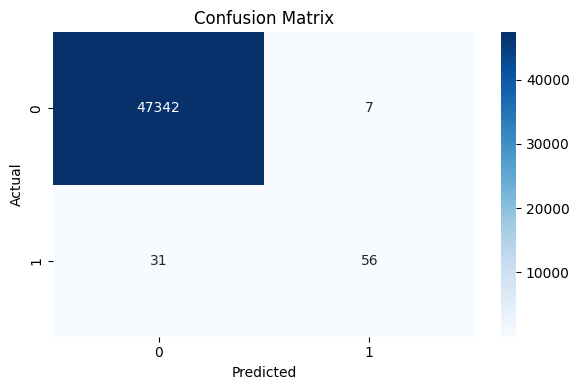

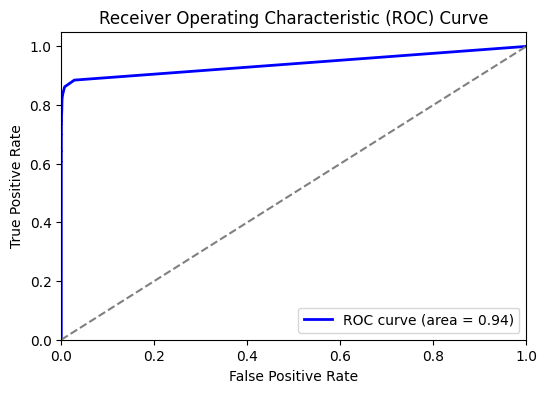

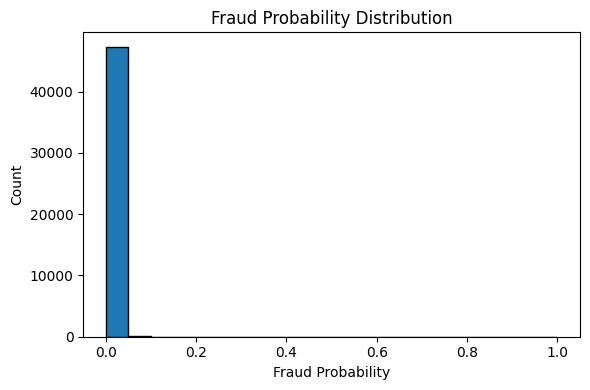

In [ ]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# FRAUD PROBABILITY HISTOGRAM
plt.figure(figsize=(6,4))
plt.hist(y_proba, bins=20, edgecolor="black")
plt.title("Fraud Probability Distribution")
plt.xlabel("Fraud Probability")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
# Get column names from the training features
feature_columns = X.columns.tolist()

# Create a sample DataFrame with the correct column names and some dummy values
sample_data = {col: [0.0] for col in feature_columns}
sample = pd.DataFrame(sample_data)

pred = model.predict(sample)[0]
prob = model.predict_proba(sample)[0][1]

print("\n=== SAMPLE PREDICTION ===")
print("Fraud Prediction :", pred)
print("Fraud Probability:", prob)


=== SAMPLE PREDICTION ===
Fraud Prediction : 0
Fraud Probability: 0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle NaN values in y_train by dropping corresponding rows from both X_train and y_train
nan_mask_train = y_train.isna()
X_train = X_train[~nan_mask_train]
y_train = y_train[~nan_mask_train]

# Handle NaN values in y_test by dropping corresponding rows from both X_test and y_test
nan_mask_test = y_test.isna()
X_test = X_test[~nan_mask_test]
y_test = y_test[~nan_mask_test]

print(f"X_train shape before fit: {X_train.shape}")
print(f"y_train shape before fit: {y_train.shape}")

model = Pipeline(steps=[
    ('preprocessor', preprocess),
    ('classifier', RandomForestClassifier(random_state=42))
])

model.fit(X_train, y_train)
print("✔ Model trained successfully!")

X_train shape before fit: (189743, 14)
y_train shape before fit: (189743,)
✔ Model trained successfully!
